<div Привет Алексей! Высылаю проект на повторную проверку!
</div>

## Проект: Принятие решений в бизнесе

**Цель проекта**-приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты.

## Описание данных

В нашем распоряжении три датасета:

Гипотезы по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:

Результаты проведения A/B-теста описаны в файлах: 

## Загрузка данных и подготовка их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

### Файл с данными о гипотезах

In [2]:
dat = pd.read_csv('/datasets/hypothesis.csv') #сохраняем в датафрейм 

In [3]:
dat

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
dat.columns = dat.columns.str.lower() # приводим названия заголовков к строчным буквам

In [5]:
dat

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Файл с данными о заказах

In [6]:
orders = pd.read_csv('/datasets/orders.csv') #сохраняем в датафрейм

In [56]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # изменим тип данных

In [10]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum() # проверим датайфрейм на дубликаты

0

In [13]:
orders.isna().sum() # проверим датайфрейм на наличие пропусков

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

### Файл с данными о визитах пользователей

In [14]:
visitors = pd.read_csv('/datasets/visitors.csv') #сохраняем в датафрейм

In [55]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))# изменим тип данных

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visitors.duplicated().sum() # проверим датайфрейм на дубликаты

0

In [20]:
visitors.isna().sum()# проверим датайфрейм на наличие пропусков

date        0
group       0
visitors    0
dtype: int64

**Подведем итог обзора данных:**

- мы привели названия столбцов к общепринятому виду;
- изменили типы данных в соответсвии с их содержанием;
- проверили данные на наличие дубликатов: явных дубликатов не обнаружено;
- проверили данные на наличие пропусков. Пропусков не обнаружено.

##  Приоритизация гипотез.

Приоритизируем гипотезы методом ICE и RICE. 

Метод ICE – это относительно быстрый способ присвоить конкретное числовое значение различным гипотезам для обозначения их приоритетности. Обычно это делается на основе определения относительной ценности и с использованием трёх параметров этой оценки: влияния, уверенности и стоимости.
Метод RICE — это метод определения приоритетов, который включает в себя уже 4 элемента: охват (покрытие), влияние, уверенность (в оценке охвата и влияния) и стоимость. Т.о. основное отличие методов заключается в том, что метод RICE  предполагает ещё и оценку охвата, т.е. предполагаемой целевой аудитории проекта.

In [21]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
dat

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE для приоритизации гипотез

In [22]:
dat['ICE']=round(dat['impact']*dat['confidence']/dat['efforts'], 2)
#dat[['hypothesis','ICE']].sort_values('ICE', ascending=( False ))
pd.set_option('max_colwidth', 110)
pd.set_option('display.width', 1000)
dat[['hypothesis','ICE']].sort_values('ICE', ascending=( False )).head(10)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE - это 8, 0, 7, 6 и 2.

### Фреймворк RICE для приоритизации гипотез

In [23]:
dat['RICE']=round(dat['reach']*dat['impact']*dat['confidence']/dat['efforts'],2)

pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
dat[['hypothesis','RICE']].sort_values('RICE', ascending=( False )).head(10)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE - это 7, 2, 0, 6 и 8.

### Вывод 

Компоненты методов:

* impact - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* confidence - насколько вы уверены, что это изменение повлияет на пользователей именно так;
* efforts - сколько стоит протестировать эту гипотезу;
* reach - скольких пользователей затронет изменение, которое вы хотите внести.

Мы приоритизировали гипотезы. 

Методом ICE наиболее перспективные:
1. N8 - Запустить акцию, дающую скидку на товар в день рождения
2. N0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
3. N7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. N6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. N2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

У гипотез N8 и N2 высокие показатели impact	и confidence и при этом не очень высокий показатель efforts.

Методом RICE наиболее перспективные:
1. N7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. N2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. N0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
4. N6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. N8 - Запустить акцию, дающую скидку на товар в день рождения

Те же гипотезы, только уже в другом порядке. N2 и N7 гипотезы переместились выше по местам за счет того, что они имеют высокий параметр reach, 8 и 10 соответственно, параметр, указывающий скольких пользователей затронет изменение. У N8 и N0 гипотезы этот параметр низкий: 1 и 3 соответственно. 
Самый низкий приоритет у гипотезы N4 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей, у нее самые низкие значения компонент.

 ## Анализ A/B-теста

Перед проведением А/В теста проверим данные

 A/B-тесты проводят, чтобы точно измерить эффект от внедрения изменения. В нашем случае в тесте участвовали 2 группы: А и В. Длительность проведения теста 31 день: с 2019-08-01 по 2019-08-31. В группе A 503 участника, в группе B - 586. После удаления пользователей, которые оказались сразу в двух группах, получили, что в группе A - 445, в	B - 528 участников. Группа В по численности превосходит группу А почти на 19%, группы не сбалансированны по численности. 

In [24]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [25]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [26]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [27]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [28]:
orders.pivot_table(index=['visitor_id', 'group'],  aggfunc='count').sort_values(by='visitor_id')

date  revenue  transaction_id
visitor_id group                               
5114589    B         1        1               1
6958315    B         1        1               1
8300375    A         1        1               1
           B         1        1               1
11685486   A         1        1               1
...                ...      ...             ...
4266935830 B         1        1               1
4278982564 A         1        1               1
4279090005 B         1        1               1
4281247801 B         1        1               1
4283872382 B         1        1               1

[1089 rows x 3 columns]

Удалим пользователей, которые присутствуют и в группе А и в группе В. Иначе мы можем сделать неправильные выводы относительно результатов теста.

In [29]:
dulicat_A = orders.query('group == "A"')
s = dulicat_A['visitor_id'].tolist()
dulicat_B = orders.query('group == "B"')
s2 = dulicat_B['visitor_id'].tolist()

In [30]:
orders_without_dubl = orders.query('(group == "B" and  visitor_id not in @s) or (group == "A" and  visitor_id not in @s2)')
orders_without_dubl.sort_values(by='visitor_id').head()

,transaction_id,visitor_id,date,revenue,group
56,900025958,5114589,2019-08-16,570,B
573,1887336629,6958315,2019-08-04,1490,B
233,797272237,11685486,2019-08-23,6201,A
912,437876380,39475350,2019-08-08,3990,B
924,3778001764,47206413,2019-08-10,730,B


In [31]:
print('Удалили из данных пользователей:',\
orders['visitor_id'].nunique()-orders_without_dubl['visitor_id'].nunique())

Удалили из данных пользователей: 58


In [32]:
orders.groupby('group', as_index=False).agg({'visitor_id': 'sum', 'visitor_id':'nunique'})

,group,visitor_id
0,A,503
1,B,586


In [33]:
orders_without_dubl.groupby('group', as_index=False).agg({'visitor_id': 'sum', 'visitor_id':'nunique'})

,group,visitor_id
0,A,445
1,B,528


Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [34]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_without_dubl[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_without_dubl[np.logical_and\
(orders_without_dubl['date'] <= x['date'], orders_without_dubl['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and\
(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


### График кумулятивной выручки по группам

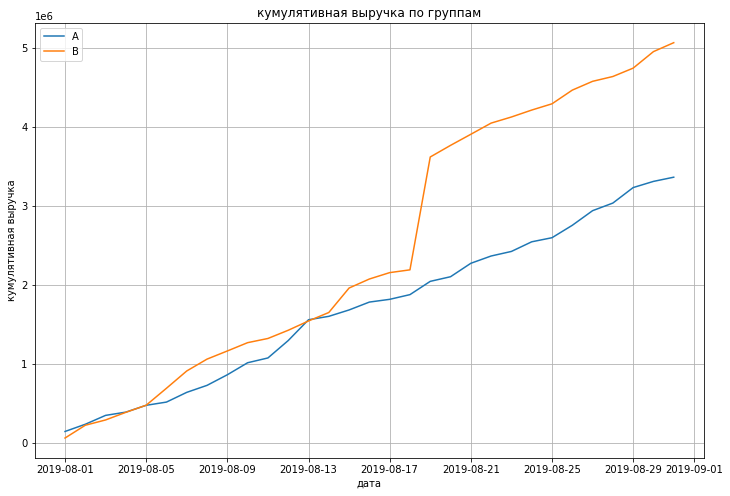

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.grid(b=True)
#plt.axis(["2019-08-01", '2019-09-01', 0, 0.015])
plt.title('кумулятивная выручка по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка');

Выручка группы А почти равномерно увеличивается в течение всего теста. Выручка группы В так же в течении всего времени увеличивается, но присутствует резкий скачек в середине теста. Это может сигнализировать о появлении очень дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам


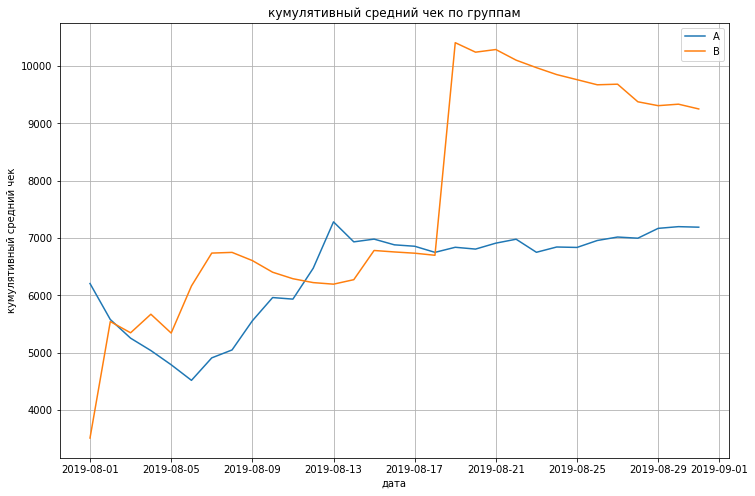

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.grid(b=True)
plt.title('кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек');

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B, после резкого скачка (возможно, в группу B в середине теста попали крупные заказы). Возможно группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

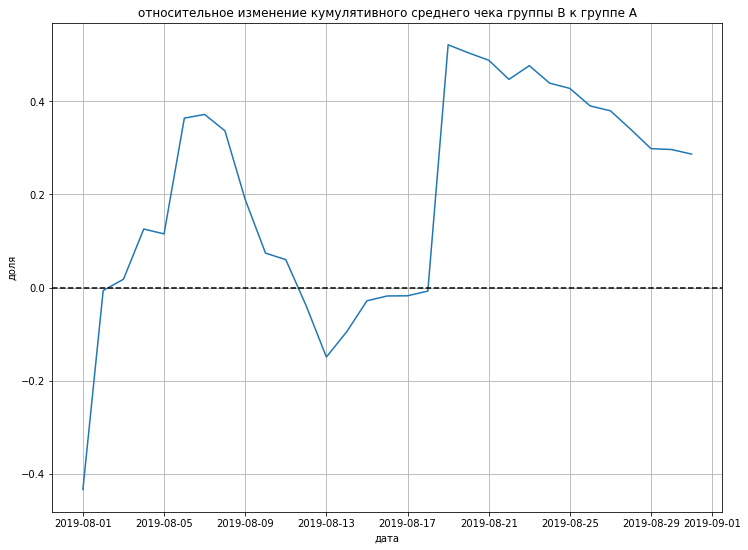

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.\
merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 9))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(b=True)
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('доля');

В нескольких точках график различия между сегментами резко «скачет». Видимо в этих точках были совершены аномальные заказы. 

### График кумулятивного среднего количества заказов на посетителя по группам

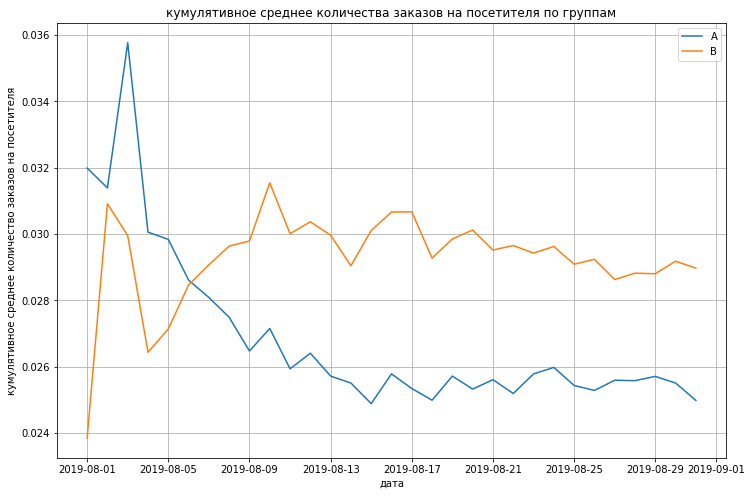

In [38]:
# считаем кумулятивное среднее количества заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,8))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(b=True)
# задаем масштаб осей
#plt.axis(['2019-08-01', '2019-09-01', 0, 0.04])
plt.title('кумулятивное среднее количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов на посетителя');

В начале теста сегмент А имел большее кумулятивное среднее количества заказов на посетителя, но в течении первых двух недель теста оно снизилось примерно до 2.55% и зафиксировалось около этого значения. Сегмент В, напротив, в начале теста имел меньшее кумулятивное среднее количества заказов на посетителя и оно сильно колебалось в течении первой недели, затем сегмент В обогнал сегмент А по значению, к концу теста мы видим, что оно остановилось около значения 2.9%. 

In [39]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A


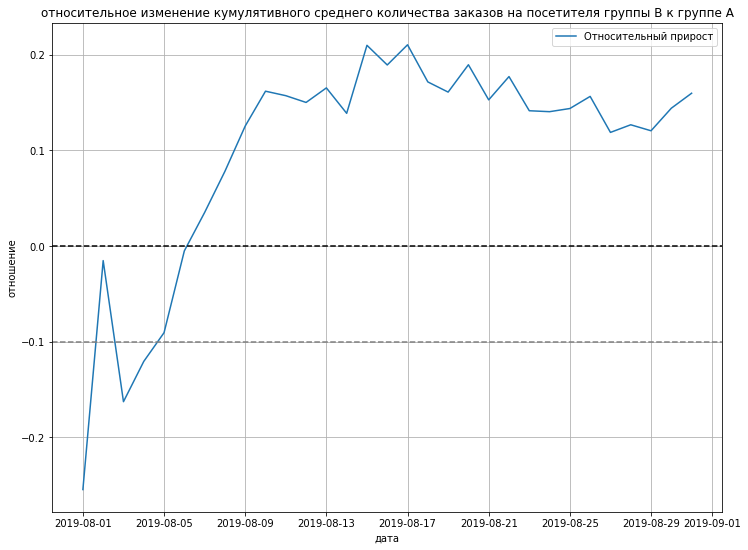

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 9))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост")
plt.legend()
plt.grid(b=True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('дата')
plt.ylabel('отношение');

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и зафиксировалась около прироста в 15% относительно группы А.

### Точечный график количества заказов по пользователям

In [41]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


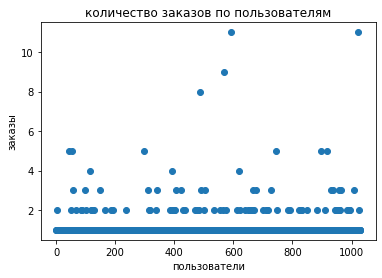

In [42]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('количество заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('заказы');

Много пользователей с 2-3 заказами. Найдем их точную долю, чтобы понять, аномалии это или нет. 

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [43]:
#Посчитаем перцентили количества заказов на одного пользователя:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше, чем два заказа. И 1% пользователей заказывали более четырех раз. Примем за аномальных пользователей тех, кто совершил от 3 заказов. 

### Точечный график стоимостей заказов

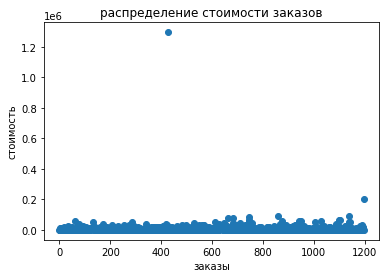

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('распределение стоимости заказов')
plt.xlabel('заказы')
plt.ylabel('стоимость');

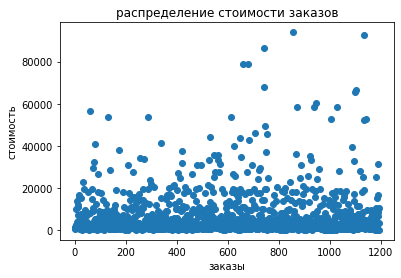

In [45]:
w = orders.query('revenue < 200000')
x_values = pd.Series(range(0,len(w['revenue'])))
plt.scatter(x_values, w['revenue'])
plt.title('распределение стоимости заказов')
plt.xlabel('заказы')
plt.ylabel('стоимость');

Есть единичные очень дорогие заказы. Много заказов от 20000 до 40000.

###  95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [46]:
#Посчитаем перцентили стоимости заказов:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Примем за границу аномальных заказов, заказы стоимостью больше 28000 рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным


В нашем случае в данных есть большие выбросы, алгебраические метрики работают плохо. Поэтому воспользуемся одним из  непараметрических методов - критерием Манна-Уитни. Эти методы работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем между группами есть.

In [47]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

#переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. 
#Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                #data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                 visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                #data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [48]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [49]:
#Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#Выведем относительный прирост среднего числа заказов группы B:
print('относительный прирост группы B:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительный прирост группы B: 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
И найдём относительные различия в среднем чеке между группами:

In [50]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']\
        ['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост группы B:','{0:.3f}'.format(orders[orders['group']=='B']\
        ['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
относительный прирост группы B: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно выше среднего чека группы A.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём до 5% пользователей с наибольшим числом заказов и до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [51]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
a = abnormalUsers.shape[0]/orders_without_dubl['visitor_id'].nunique()
v = abnormalUsers.shape[0]
print(abnormalUsers.head(5))
print()
print(f'Количество аномальных пользователей составило: {v}, что соответствует {a:.1%} относительно общего числа пользователей')

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Количество аномальных пользователей составило: 74, что соответствует 7.6% относительно общего числа пользователей


Удалено 74 аномальных пользователя, потеряли 7.6 % данных.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

 Вновь сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем между группами есть.

In [52]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                #data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                visitors[visitors['group'] == 'A']['visitors'].sum()- len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                #data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                visitors[visitors['group'] == 'B']['visitors'].sum()- len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [53]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
относительный прирост группы B: 0.173


Результаты по среднему количеству заказов изменились. Мы так же получили p-value  меньше 0.05, т.е. нулевую гипотезу -различий в среднем количестве заказов на посетителя между группами нет, отвергаем. Относительный выигрыш группы B равен уже 17.3% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [54]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительный прирост группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
относительный прирост группы B: -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Отметим, что разница между сегментами сократилась с 25.9% до -2%: средний чек группы B немного ниже среднего чека группы A.

## Решение по результатам теста: 



В результате проведения А/В теста мы выявили следующие факты:

  Выручка в двух группа растет в течении всего времени проведения теста. Из графика относительного изменения кумулятивного среднего чека группы B к группе A трудно сделать вывод, поскольку наблюдаем резкие скачки из-за аномальных заказов. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, показывает, что начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и зафиксировалась около прироста в 15% относительно группы А.
Был проведен анализ выбросов и всплесков. К аномальным пользователям отнесены те, которые сделали более двух заказов либо заказы на сумму более 28000 рублей. 
Подсчет статистической значимости тестом Манна-Уитни по «сырым» и по данным после фильтрации аномалий, показал что:

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. После удаления аномалий разница между сегментами сократилась с 25.9% до -2%: средний чек группы B чуть ниже среднего чека группы A.
* Есть статистически значимые различия по среднему количеству заказов на посетителя между группами и по «сырым» и по данным после фильтрации аномалий. По сырым данным имеется относительный выигрыш группы B, он равен 13.8%, по очищенным данным выигрыш группы B равен уже 17.3%. 

Таким образом, группа В показывает значительный прирост по среднему количеству заказов относительно группы А, который зафиксировался около значения 15%: **остановить тест, зафиксировать победу группы В.** 

